# Stroke Prediction Model

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df=pd.read_csv('dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Pre-processing

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.shape

(43400, 12)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.isnull().sum()/len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.033687
smoking_status       0.306267
stroke               0.000000
dtype: float64

## Checking the duplicates

In [7]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [8]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

## EDA and Visualization

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
********************


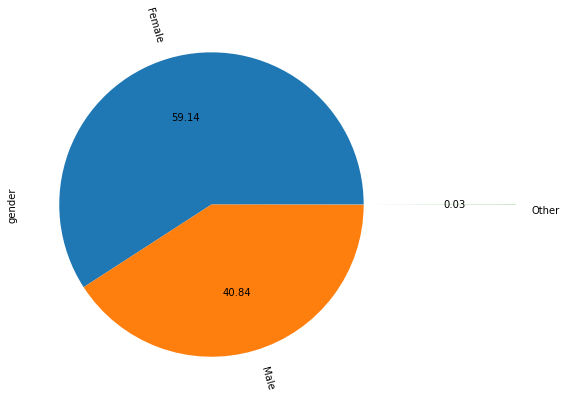

In [9]:
plt.figure(figsize=(7,7))
df['gender'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,1])
print(df.gender.value_counts())
print('*'*20)
plt.show()

### From the Above count plot, we observe the ratio for males and females. the count for males in the dataset are 17724 and the count for female in the dataset are 25665

In [10]:
df.age.nunique()

104

In [11]:
df['Age Category'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False)

In [12]:
age_counts = df['Age Category'].value_counts().sort_index()


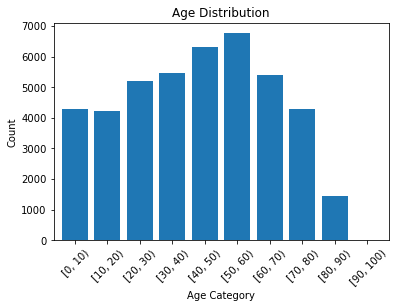

In [13]:
age_counts.plot(kind='bar', width=0.8)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


### From the above bar plot, we observe the age category, and we observe that the age category in the dataset is the 40 to 60 age group.

In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [15]:
df.hypertension.nunique()

2

0    39339
1     4061
Name: hypertension, dtype: int64
********************


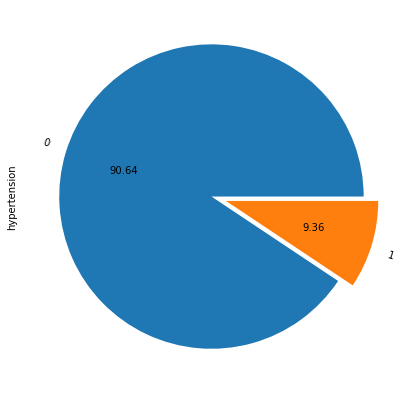

In [16]:
plt.figure(figsize=(7,7))
df['hypertension'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.hypertension.value_counts())
print('*'*20)
plt.show()

### In the dataset, we have assumed 0 is the population with no hypertension, and the count for that is 39339, and 1 is the population with hypertension, with a count of 4061.

In [17]:
df.heart_disease.nunique()

2

0    41338
1     2062
Name: heart_disease, dtype: int64
********************


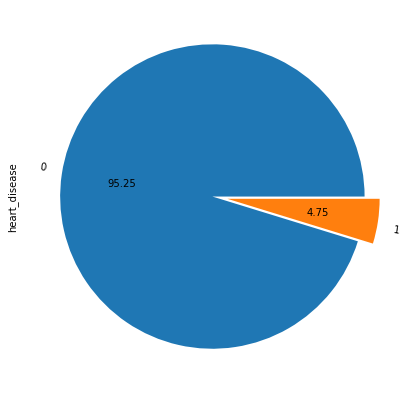

In [18]:
plt.figure(figsize=(7,7))
df['heart_disease'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.heart_disease.value_counts())
print('*'*20)
plt.show()

### In the dataset, we have assumed 0 is the population with no heart disease, and the count for that is 41338, and 1 is the population with heart disease, with a count of 2062.

In [19]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [20]:
df.ever_married.nunique()

2

Yes    27938
No     15462
Name: ever_married, dtype: int64
********************


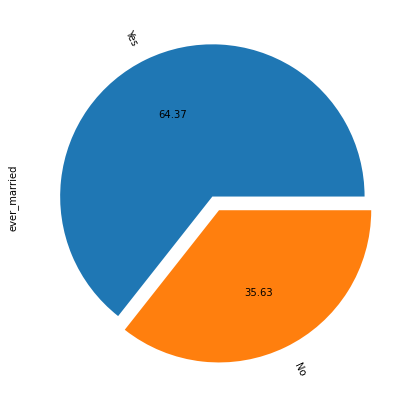

In [21]:
plt.figure(figsize=(7,7))
df['ever_married'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.ever_married.value_counts())
print('*'*20)
plt.show()

### In the dataset, we have the married category, in which 65% of people are married and 35% are single.

In [22]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [23]:
df.work_type.nunique()

5

********************
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
********************


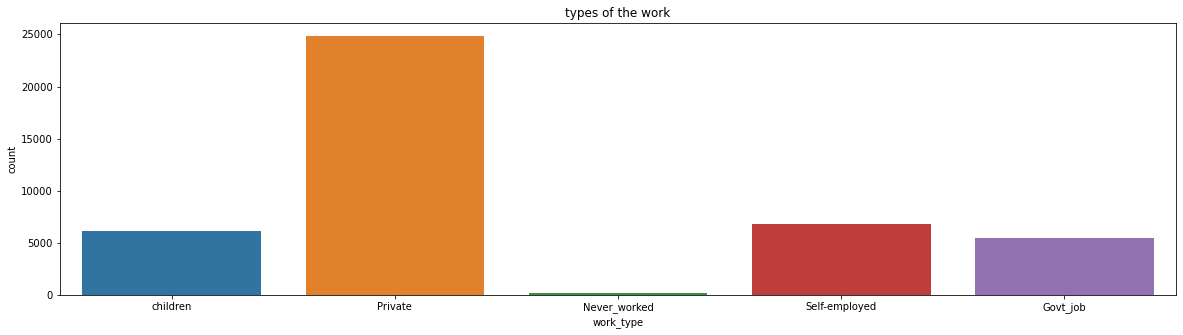

In [24]:
# Seeing which car sold most
plt.figure(figsize=(20,5))
sns.countplot(x='work_type' , data=df)
plt.title('types of the work')
print('*'*20)
print(df['work_type'].value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe that most people are in private occupations, followed by self-employed and government jobs.

In [25]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [26]:
df.Residence_type.nunique()

2

Yes    27938
No     15462
Name: ever_married, dtype: int64
********************


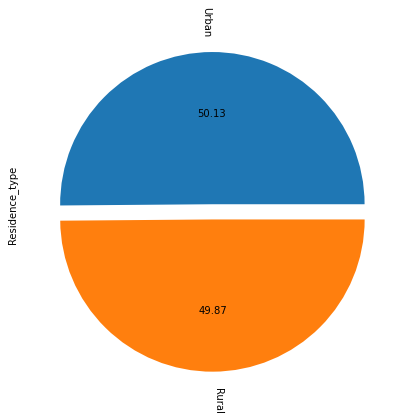

In [27]:
plt.figure(figsize=(7,7))
df['Residence_type'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.ever_married.value_counts())
print('*'*20)
plt.show()

### From the above graph, we observe that people from both areas are almost equal.

In [174]:
# Filling the null values 

In [28]:
nan_values = df['smoking_status'].isna()
df[nan_values]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age Category
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,"[0, 10)"
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,"[0, 10)"
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,"[10, 20)"
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0,"[40, 50)"
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0,"[70, 80)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0,"[0, 10)"
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0,"[60, 70)"
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0,"[10, 20)"
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0,"[0, 10)"


In [29]:

df.loc[(df['smoking_status'].isna()) & (df['age'] < 18)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age Category
0,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,NaN,0,"[0, 10)"
2,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,NaN,0,"[0, 10)"
4,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,"[10, 20)"
33,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,NaN,0,"[0, 10)"
35,26325,Male,14.00,0,0,No,Govt_job,Urban,82.34,31.6,NaN,0,"[10, 20)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,62703,Male,1.72,0,0,No,children,Rural,81.38,17.8,NaN,0,"[0, 10)"
43376,65913,Female,3.00,0,0,No,children,Rural,83.32,21.3,NaN,0,"[0, 10)"
43382,35179,Female,9.00,0,0,No,children,Urban,68.49,16.8,NaN,0,"[0, 10)"
43389,30759,Male,14.00,0,0,No,children,Urban,82.48,24.8,NaN,0,"[10, 20)"


In [30]:

df.loc[(df['smoking_status'].isna()) & (df['age'] > 18)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age Category
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0,"[40, 50)"
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0,"[70, 80)"
20,29217,Female,65.0,1,0,Yes,Private,Rural,75.70,41.8,NaN,0,"[60, 70)"
30,67210,Male,27.0,0,0,Yes,Self-employed,Urban,82.90,25.0,NaN,0,"[20, 30)"
31,29908,Female,47.0,0,0,Yes,Private,Urban,103.26,25.4,NaN,0,"[40, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43367,45683,Male,62.0,0,1,Yes,Govt_job,Urban,71.90,26.9,NaN,0,"[60, 70)"
43368,50503,Female,34.0,0,0,Yes,Private,Urban,85.86,40.1,NaN,0,"[30, 40)"
43372,45066,Male,36.0,1,0,Yes,Private,Urban,149.22,33.4,NaN,0,"[30, 40)"
43379,13530,Male,47.0,0,1,Yes,Govt_job,Urban,89.25,29.0,NaN,0,"[40, 50)"


In [31]:
df.smoking_status.unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [32]:
# Define a function to impute 'smoking_status' based on age
def impute_smoking_status(row):
    if pd.isna(row['smoking_status']):
        if row['age'] > 25:
            return 'smokes'
        elif 19 <= row['age'] <= 25:
            return 'formerly smoked'
        else:
            return 'never smoked'
    else:
        return row['smoking_status']

# Apply the impute_smoking_status function to each row
df['smoking_status'] = df.apply(impute_smoking_status, axis=1)

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age Category
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,"[0, 10)"
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,"[50, 60)"
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,"[0, 10)"
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,"[70, 80)"
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,"[10, 20)"


********************
1    19786
2    10350
0     6403
Name: smoking_status, dtype: int64
********************


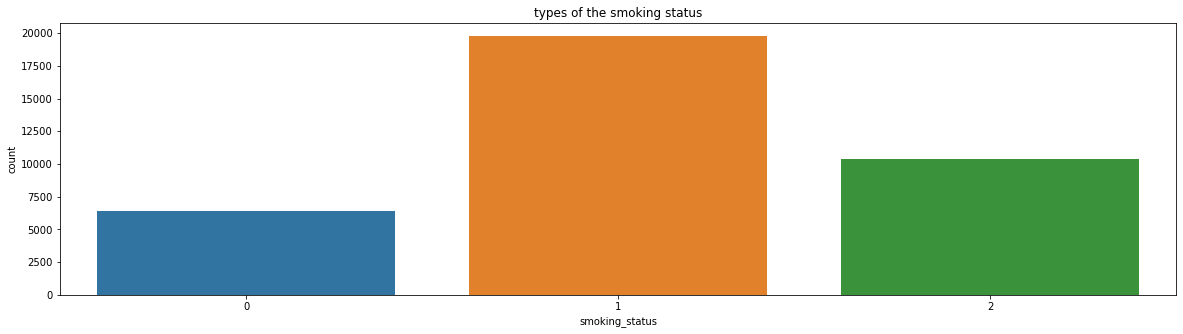

In [173]:
# Seeing which car sold most
plt.figure(figsize=(20,5))
sns.countplot(x='smoking_status' , data=df)
plt.title('types of the smoking status')
print('*'*20)
print(df['smoking_status'].value_counts())
print('*'*20)
plt.show()

### For this, we have 3 categories: never smoked, formerly smoked, and smoked. So in this, we have null values too. I have tested null values, like if the age group is between 0 and 18 never smokes, then 19 to 25 formerly smoke, and after that, the person smokes.

In [34]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [35]:
df['bmi'].mean()

28.605038390004545

In [36]:
df['bmi'].fillna(2283.3004408418697 , inplace=True)

In [37]:
df.dtypes

id                      int64
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
Age Category         category
dtype: object

In [38]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age Category         0
dtype: int64

In [39]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

0    42617
1      783
Name: stroke, dtype: int64
********************


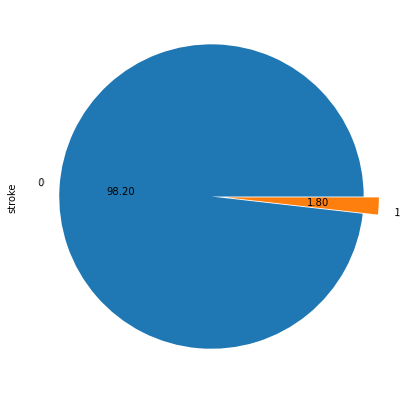

In [40]:
plt.figure(figsize=(7,7))
df['stroke'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.stroke.value_counts())
print('*'*20)
plt.show()

### From the above chart, we observe and assume that 0 is a non-stroke person with almost 98%, and 2% is a stroke person. So we can say that our data is an imbalanced data set.

<AxesSubplot:xlabel='gender', ylabel='count'>

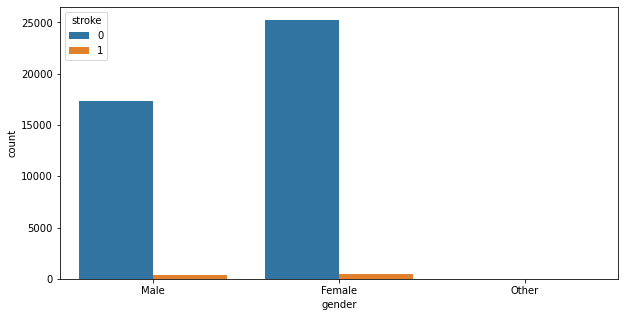

In [41]:

plt.figure(figsize=(10,5))
sns.countplot(x="gender", hue="stroke" , data=df)


<AxesSubplot:xlabel='ever_married', ylabel='count'>

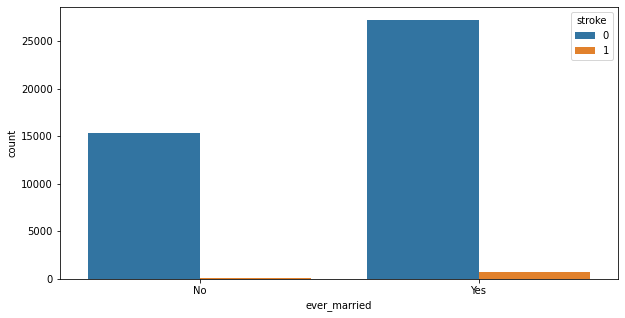

In [42]:

plt.figure(figsize=(10,5))
sns.countplot(x="ever_married" , hue="stroke" , data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

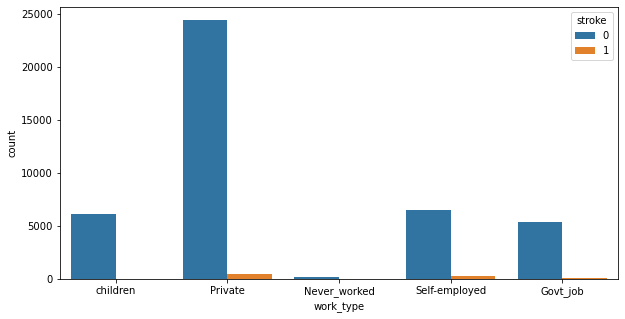

In [43]:

plt.figure(figsize=(10,5))
sns.countplot(x='work_type' , hue="stroke" , data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

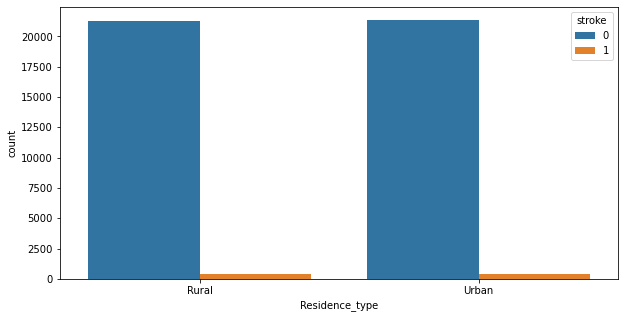

In [44]:


plt.figure(figsize=(10,5))
sns.countplot(x="Residence_type" , hue="stroke" , data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

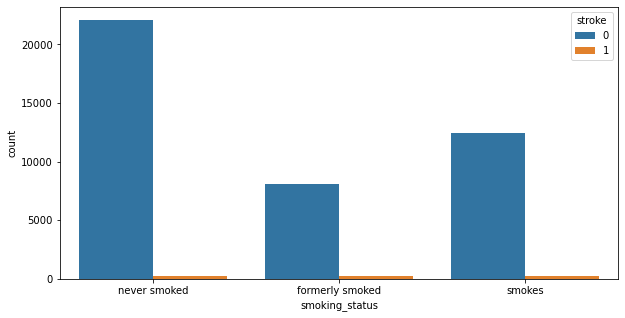

In [45]:


plt.figure(figsize=(10,5))
sns.countplot(x="smoking_status" , hue="stroke" , data=df)

In [46]:
#describe dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,104.558142,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,406.871468,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,33.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,2283.300441,1.000000


### Observation

** There are no null values present in the dataset.

** In the age column, we have some data scattered, as the standard deviation is almost half of its mean.

** In the hypertension column and the heart disease column, we have some data scattered as the standard deviation is greater than the mean.

** The AVG glucose level looks fine.

** There are scatter data points in the BMI column.

# Applying Encoder technique

In [47]:
df.dtypes

id                      int64
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
Age Category         category
dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()
df1=le.fit_transform(df['gender'])
pd.Series(df1)
df['gender']=df1

In [50]:
df2=le.fit_transform(df['ever_married'])
pd.Series(df2)
df['ever_married']=df2

In [51]:
df3=le.fit_transform(df['work_type'])
pd.Series(df3)
df['work_type']=df3

In [52]:
df4=le.fit_transform(df['Residence_type'])
pd.Series(df4)
df['Residence_type']=df4

In [53]:
df5=le.fit_transform(df['smoking_status'])
pd.Series(df5)
df['smoking_status']=df5

In [54]:
df.dtypes

id                      int64
gender                  int32
age                   float64
hypertension            int64
heart_disease           int64
ever_married            int32
work_type               int32
Residence_type          int32
avg_glucose_level     float64
bmi                   float64
smoking_status          int32
stroke                  int64
Age Category         category
dtype: object

# Splitting the label and feature to apply SMOTE

In [55]:
# seperate label n feature
X=df.drop(['id' , 'stroke' , 'Age Category'], axis=1)
y=df.stroke

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [58]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 31955, 1: 595})

In [59]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


# Import SMOTE

In [60]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 31955, 1: 595})
the number of classes after fit:  Counter({0: 31955, 1: 23966})


# Plotting the heatmap to observe Co-relation

In [61]:
corr=df.corr()
corr.shape

(12, 12)

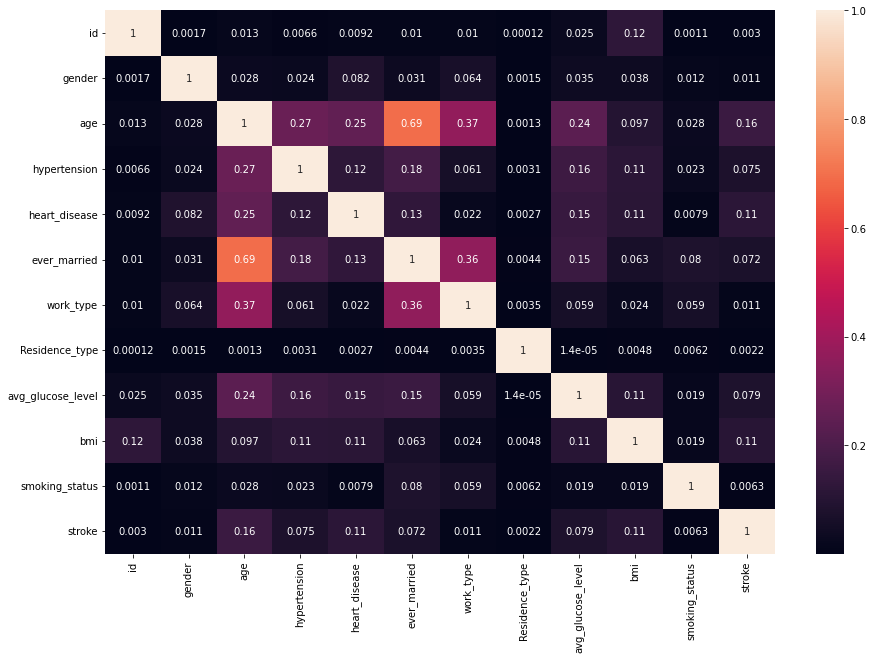

In [62]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

### From the above heatmap, we observe that there is no such issue of multicollinearity.

# Plotting Histogram plot to see how data is distributed on an interval scale

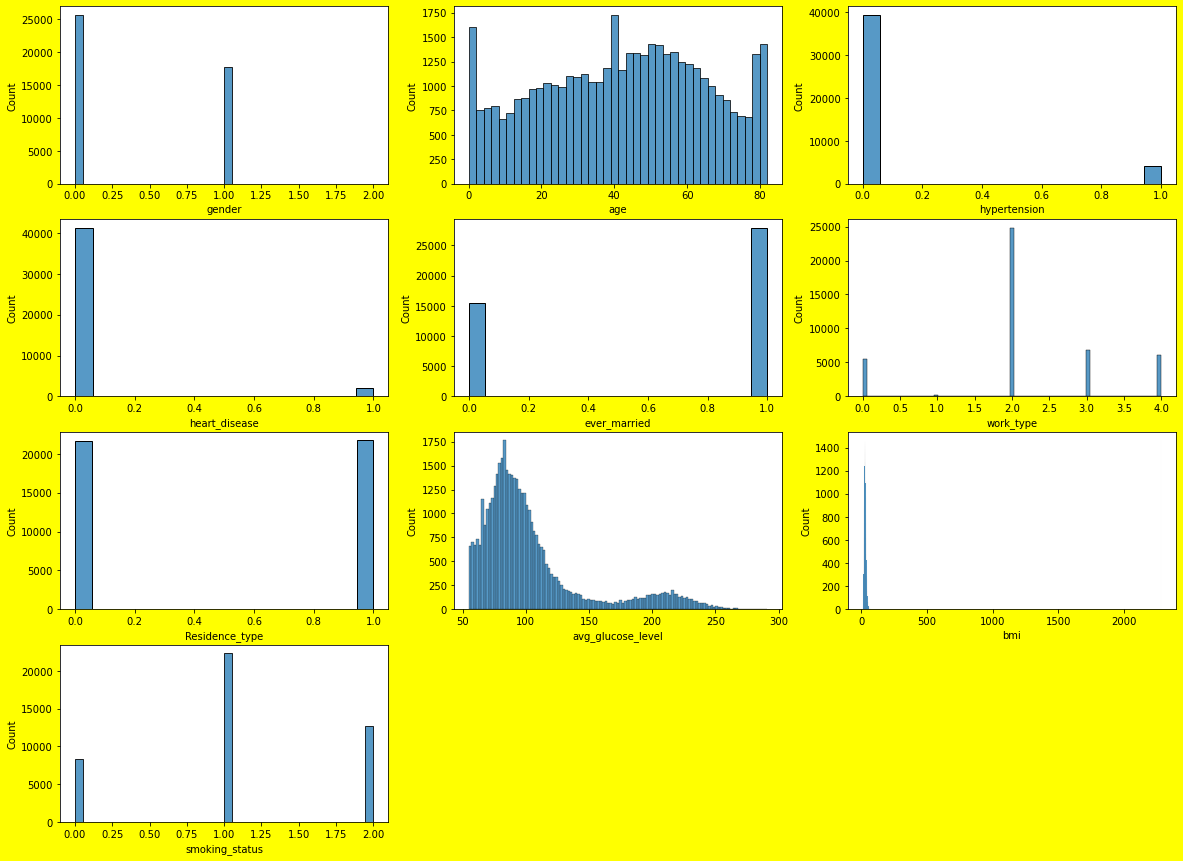

In [63]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot (X[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## So here our continuous data is only age and avg_glucose_level, and we observe skewness.

# Plotting Distribution plot to see how data is distributed

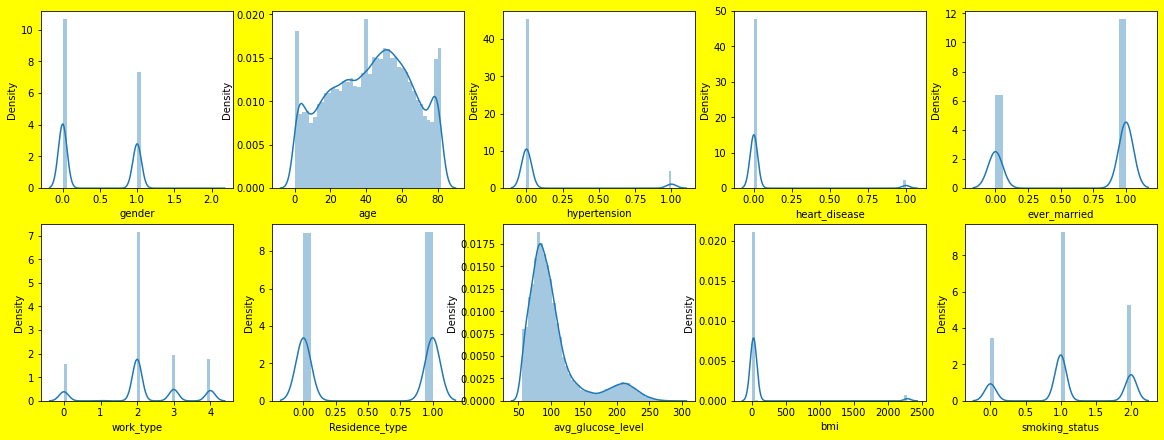

In [64]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot (X[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

# Plotting Scatter plot to see realtion between feature and label

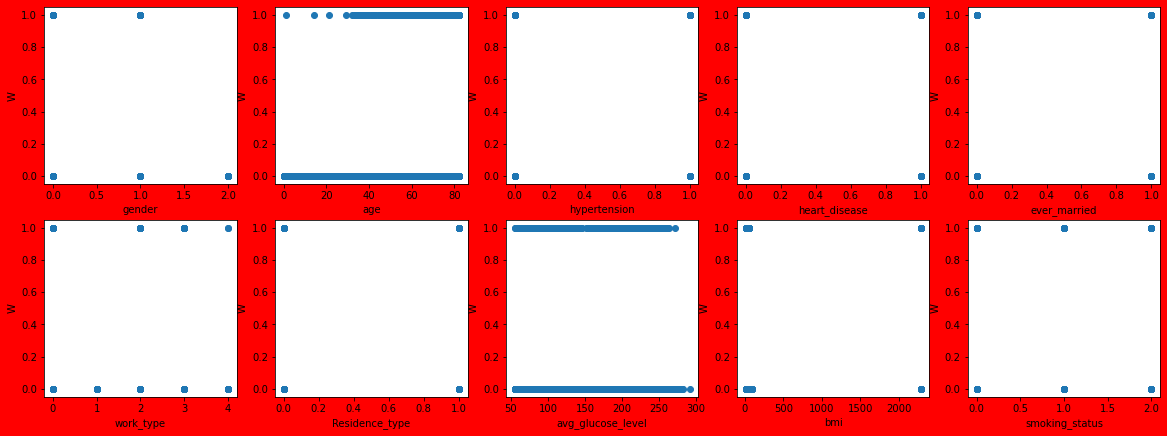

In [65]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

# Plotting Regression plot to see realtion between feature and label

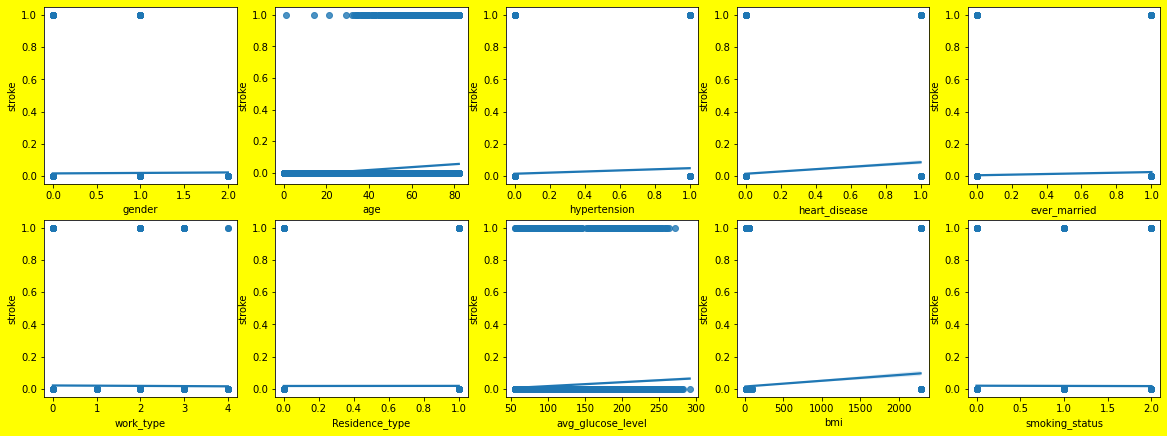

In [66]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above scatter plot and regression plot, we observe that most of the features are positively related to our label, and some of the features are non-linear.

# Plotting Box plot to see outliers are present are not

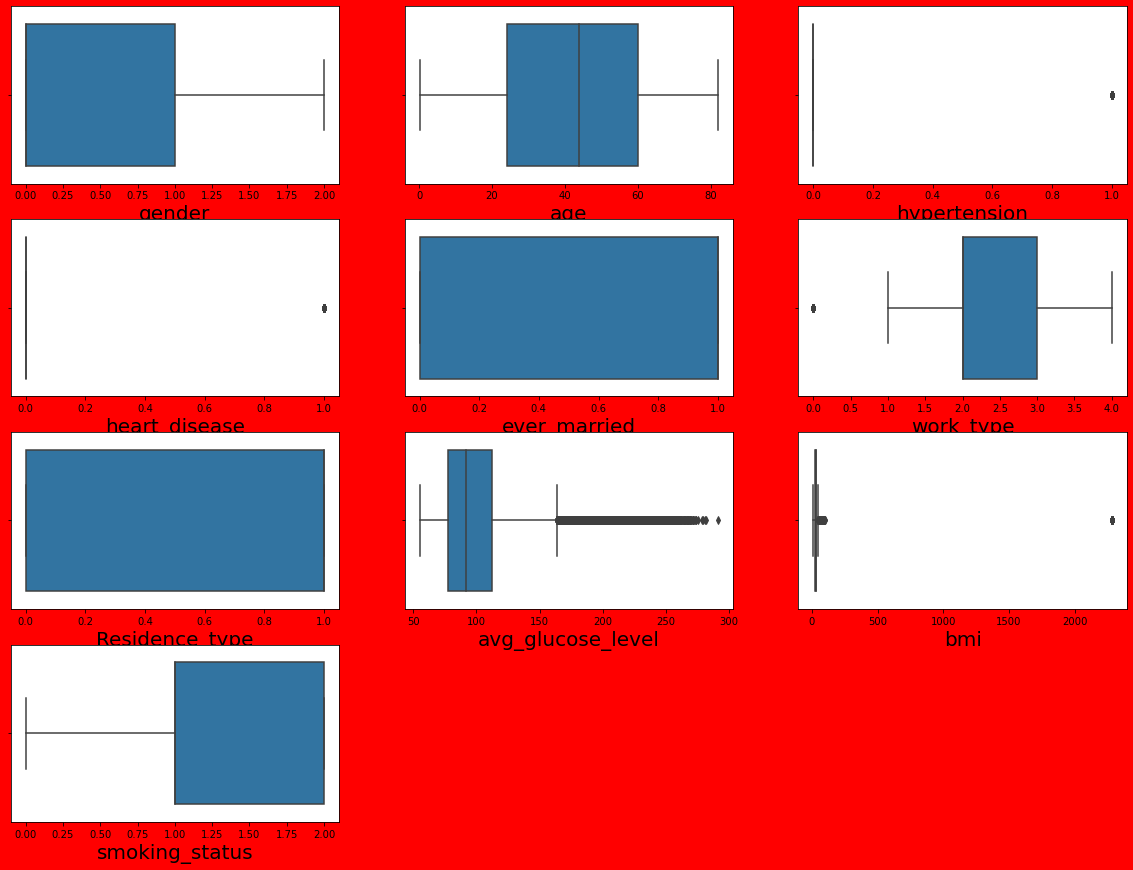

In [67]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 12:
        plt.subplot (4,3,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## So we observe some outliers in hypertension, heart disease, work type, BMI, and AVG glucose level, and we have to treat them.

In [68]:
df.shape

(43400, 13)

# Treating Outliers with Z-score Method

In [69]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [71]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3.0 ).all(axis=1)

df = df[filtering_entry]

df.describe()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,36539.000000,36539.000000,36539.000000,36539.0,36539.0,36539.000000,36539.000000,36539.000000,36539.000000,36539.000000,36539.000000,36539.000000
mean,36720.328252,0.394236,38.773917,0.0,0.0,0.599086,2.218096,0.501820,99.068458,28.081059,1.108022,0.009716
std,20902.289474,0.488693,21.894372,0.0,0.0,0.490090,1.115639,0.500004,35.811194,7.660097,0.668461,0.098089
min,4.000000,0.000000,0.080000,0.0,0.0,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,18688.500000,0.000000,21.000000,0.0,0.0,0.000000,2.000000,0.000000,76.830000,22.700000,1.000000,0.000000
50%,36877.000000,0.000000,39.000000,0.0,0.0,1.000000,2.000000,1.000000,90.170000,27.200000,1.000000,0.000000
75%,54727.000000,1.000000,55.000000,0.0,0.0,1.000000,3.000000,1.000000,108.100000,32.300000,2.000000,0.000000
max,72943.000000,1.000000,82.000000,0.0,0.0,1.000000,4.000000,1.000000,233.810000,96.100000,2.000000,1.000000


## Dataloss by removing outliers

In [72]:
dataloss=((43400-36539)/43400)*100
dataloss

15.808755760368665

# Finding correlation between feature n lable using CORR method

In [73]:
#  (code type      --   feature corrwith label)

df.drop('stroke' , axis =1 ).corrwith (df.stroke)

id                   0.002728
gender               0.006307
age                  0.126066
hypertension              NaN
heart_disease             NaN
ever_married         0.060533
work_type           -0.012861
Residence_type       0.002709
avg_glucose_level    0.048086
bmi                  0.022672
smoking_status      -0.003484
dtype: float64

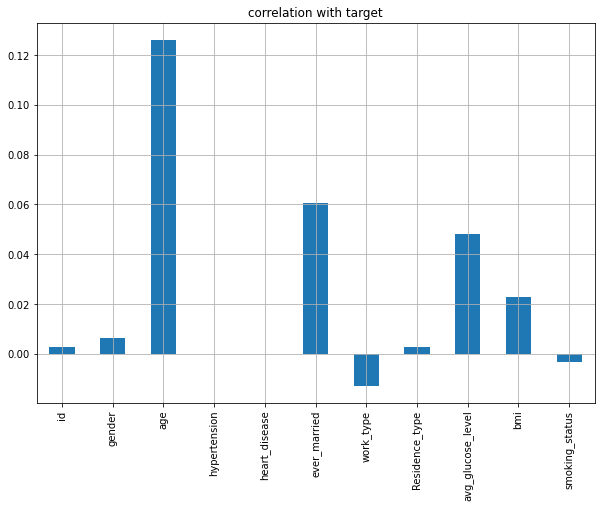

In [74]:
# convert above numbers into graph for better understanding
df.drop('stroke' , axis = 1).corrwith (df.stroke).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

# Scaling the data

In [75]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

# Checking for the multicollinearity Using VIF

In [76]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.014478,gender
1,2.234210,age
2,1.103769,hypertension
3,1.101266,heart_disease
4,1.990385,ever_married
5,1.196918,work_type
6,1.000112,Residence_type
7,1.087155,avg_glucose_level
8,1.032613,bmi
9,1.011321,smoking_status


## We assume that for this particular problem, the VIF should not be greater than 5, and since we have no values greater than 5, there is no problem of multicollinearity.

In [77]:
df.drop(['hypertension','heart_disease'],axis=1,inplace = True)

In [78]:
df.shape

(36539, 11)

In [79]:
df.columns

Index(['id', 'gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'Age Category'],
      dtype='object')

In [80]:
#Model BUilding
new_X = df[['gender','age','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

In [81]:
new_X.shape

(36539, 8)

In [83]:
y=df.stroke

In [84]:
y.shape

(36539,)

In [85]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [86]:
X_scalar.shape

(36539, 8)

# DecisionTreeClassifier

In [87]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [88]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.978544061302682 RandomState 1


MAXINING TESTING SCORE 0.978544061302682 ON RANDOM STATE OF 1
Testing Accuracy 0.9787629994526547 RandomState 2


MAXINING TESTING SCORE 0.9787629994526547 ON RANDOM STATE OF 2
Testing Accuracy 0.9796387520525451 RandomState 3


MAXINING TESTING SCORE 0.9796387520525451 ON RANDOM STATE OF 3
Testing Accuracy 0.9795292829775588 RandomState 4


Testing Accuracy 0.9775588396278051 RandomState 5


Testing Accuracy 0.9786535303776683 RandomState 6


Testing Accuracy 0.9794198139025725 RandomState 7


Testing Accuracy 0.9766830870279146 RandomState 8


Testing Accuracy 0.9805145046524357 RandomState 9


MAXINING TESTING SCORE 0.9805145046524357 ON RANDOM STATE OF 9
Testing Accuracy 0.9792008757525998 RandomState 10


Testing Accuracy 0.9786535303776683 RandomState 11


Testing Accuracy 0.9796387520525451 RandomState 12


Testing Accuracy 0.9783251231527094 RandomState 13


Testing Accuracy 0.978544061302682 RandomState 14


Testing Accuracy 0

In [89]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9820470717022441 On Random State 18


## Training the Model

In [91]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=18)

In [92]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [93]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [94]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 98.128079%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      9047
           1       0.04      0.05      0.04        88

    accuracy                           0.98      9135
   macro avg       0.52      0.52      0.52      9135
weighted avg       0.98      0.98      0.98      9135



# Model Score
    Training Score = 100.000000%
    Testing Score = 98.128079%


# Hyperparameter For DecisionTree Classifier

In [95]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [96]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [97]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [98]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [101]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 1, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=1, min_samples_split=5)

In [102]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 99.025690%
====Testing Score====
Accuracy score : 99.036672%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9047
           1       0.00      0.00      0.00        88

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.98      0.99      0.99      9135



# Model Scores With Hyperparameter Tuning
       Training Score = 99.025690%
       Testing Score = 99.036672%

# Cross Validation score for DecisionTree Classifier

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X_scalar,y,cv=6)

array([0.99031199, 0.99031199, 0.99031199, 0.99031199, 0.99014778,
       0.9903104 ])

In [104]:
cross_val_score(clf_dt,X_scalar,y,cv=6).mean()

0.990284354416962

# Confusion Matrix DecisionTree Classifier

In [105]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[9047,    0],
       [  88,    0]], dtype=int64)

# RandomForestClassifier

In [106]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [107]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9908045977011494 RandomState 1


MAXINING TESTING SCORE 0.9908045977011494 ON RANDOM STATE OF 1
Testing Accuracy 0.9897099069512862 RandomState 2


Testing Accuracy 0.9906951286261632 RandomState 3


Testing Accuracy 0.9906951286261632 RandomState 4


Testing Accuracy 0.9902572523262179 RandomState 5


Testing Accuracy 0.9894909688013136 RandomState 6


Testing Accuracy 0.9897099069512862 RandomState 7


Testing Accuracy 0.9890530925013684 RandomState 8


Testing Accuracy 0.9920087575259989 RandomState 9


MAXINING TESTING SCORE 0.9920087575259989 ON RANDOM STATE OF 9
Testing Accuracy 0.9914614121510673 RandomState 10


Testing Accuracy 0.9893814997263273 RandomState 11


Testing Accuracy 0.9900383141762452 RandomState 12


Testing Accuracy 0.9891625615763546 RandomState 13


Testing Accuracy 0.9891625615763546 RandomState 14


Testing Accuracy 0.9894909688013136 RandomState 15


Testing Accuracy 0.9908045977011494 RandomState 16


Testing Accuracy 0.9908045977011494

In [108]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9927750410509031 On Random State 69


## training the model

In [109]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=69)

In [110]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [111]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [112]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 99.277504%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores
    Training Score = 100.000000%
    Testing Score = 99.277504%


# Hyperparameter For RandomForestClassifier

In [113]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [114]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [115]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [116]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 4}


In [119]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 23, min_samples_leaf=2, min_samples_split= 7,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=23, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=4)

In [120]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.974602%
====Testing Score====
Accuracy score : 99.266557%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores With Hyperparameter Tuning
    Training Score = 98.974602%
    Testing Score = 99.266557%

# Cross Validation score for RandomForestClassifier

In [121]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_scalar,y,cv=6)

array([0.99014778, 0.99031199, 0.99014778, 0.99031199, 0.99014778,
       0.9903104 ])

In [122]:
cross_val_score(rf,X_scalar,y,cv=6).mean()

0.990174885341976

# Confusion Matrix RandomForestClassifier

In [123]:
### if you want to check confusion matrix

y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[9069,    0],
       [  66,    0]], dtype=int64)

# Support Vector Machine Model

In [124]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

In [125]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9909140667761357 RandomState 1


MAXINING TESTING SCORE 0.9909140667761357 ON RANDOM STATE OF 1
Testing Accuracy 0.9897099069512862 RandomState 2


Testing Accuracy 0.9906951286261632 RandomState 3


Testing Accuracy 0.9906951286261632 RandomState 4


Testing Accuracy 0.9902572523262179 RandomState 5


Testing Accuracy 0.9894909688013136 RandomState 6


Testing Accuracy 0.9897099069512862 RandomState 7


Testing Accuracy 0.9890530925013684 RandomState 8


Testing Accuracy 0.9920087575259989 RandomState 9


MAXINING TESTING SCORE 0.9920087575259989 ON RANDOM STATE OF 9
Testing Accuracy 0.9914614121510673 RandomState 10


Testing Accuracy 0.9893814997263273 RandomState 11


Testing Accuracy 0.9902572523262179 RandomState 12


Testing Accuracy 0.989272030651341 RandomState 13


Testing Accuracy 0.9890530925013684 RandomState 14


Testing Accuracy 0.9896004378762999 RandomState 15


Testing Accuracy 0.9909140667761357 RandomState 16


Testing Accuracy 0.991023535851122 R

In [126]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9927750410509031 On Random State 69


## Training the model

In [127]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=69)

In [128]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [129]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [130]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.945409%
====Testing Score====
Accuracy score : 99.277504%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores
    Training Score = 98.945409%
    Testing Score = 99.277504%

# Hyperparameter Tuning for SVC

In [131]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [132]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [133]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [134]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [135]:
#best parameters
gridsearch.best_params_

{'C': 1, 'gamma': 0.001}

In [138]:
# update our model and train again for new score 
svc=SVC(C=1,gamma=0.001)
svc.fit(X_train_ns,y_train_ns)

SVC(C=1, gamma=0.001)

In [139]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.945409%
====Testing Score====
Accuracy score : 99.277504%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores With Hyperparameter Tuning
    Training Score = 98.945409%
    Testing Score = 99.277504%


# Cross Validation score for SVC

In [140]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,X_scalar,y,cv=6)

array([0.99031199, 0.99031199, 0.99031199, 0.99031199, 0.99014778,
       0.9903104 ])

In [141]:
cross_val_score(svc,X_scalar,y,cv=6).mean()

0.990284354416962

# Confusion Matrix for SVC

In [142]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[9069,    0],
       [  66,    0]], dtype=int64)

# KNeighborsClassifier Model

In [143]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [144]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9912424740010947 RandomState 1


MAXINING TESTING SCORE 0.9912424740010947 ON RANDOM STATE OF 1
Testing Accuracy 0.9898193760262726 RandomState 2


Testing Accuracy 0.9909140667761357 RandomState 3


Testing Accuracy 0.9905856595511768 RandomState 4


Testing Accuracy 0.9903667214012042 RandomState 5


Testing Accuracy 0.9898193760262726 RandomState 6


Testing Accuracy 0.9899288451012589 RandomState 7


Testing Accuracy 0.9893814997263273 RandomState 8


Testing Accuracy 0.9924466338259442 RandomState 9


MAXINING TESTING SCORE 0.9924466338259442 ON RANDOM STATE OF 9
Testing Accuracy 0.9915708812260536 RandomState 10


Testing Accuracy 0.9894909688013136 RandomState 11


Testing Accuracy 0.9905856595511768 RandomState 12


Testing Accuracy 0.9896004378762999 RandomState 13


Testing Accuracy 0.989272030651341 RandomState 14


Testing Accuracy 0.9898193760262726 RandomState 15


Testing Accuracy 0.9912424740010947 RandomState 16


Testing Accuracy 0.991023535851122 R

In [145]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9926655719759168 On Random State 69


## Traning th model

In [146]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=69)

In [147]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [148]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier()

In [149]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.949059%
====Testing Score====
Accuracy score : 99.277504%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores
    Training Score =98.949059%
    Testing Score =  99.277504%

# Hyperparameter For KNeighborsClassifier

In [150]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [151]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [152]:
#give the data to object
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [153]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [156]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

clf_knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [157]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.945409%
====Testing Score====
Accuracy score : 99.277504%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       0.00      0.00      0.00        66

    accuracy                           0.99      9135
   macro avg       0.50      0.50      0.50      9135
weighted avg       0.99      0.99      0.99      9135



# Model Scores With Hyperparameter Tuning
    Training Score = 98.945409%
    Testing Score = 99.277504%

# Cross Validation score for KNN

In [158]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_knn,X_scalar,y,cv=6)

array([0.99031199, 0.99031199, 0.99031199, 0.99031199, 0.99014778,
       0.9903104 ])

In [159]:
cross_val_score(clf_knn,X_scalar,y,cv=6).mean()

0.990284354416962

# Confusion Matric for KNN

In [160]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[9069,    0],
       [  66,    0]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [162]:
from sklearn.metrics import roc_curve

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve
#from sklearn.metrics import plot_roc_curve

# AUC-ROC Curve for Training Data

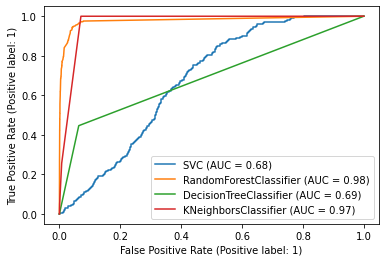

In [168]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(svc,X_train_ns,y_train_ns)
rfc_disp = RocCurveDisplay.from_estimator(rf,X_train_ns,y_train_ns,ax=disp.ax_)
dt_disp = RocCurveDisplay.from_estimator(clf_dt,X_train_ns,y_train_ns,ax=disp.ax_)
knn_disp = RocCurveDisplay.from_estimator(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

# AUC-ROC Curve for Testing Data

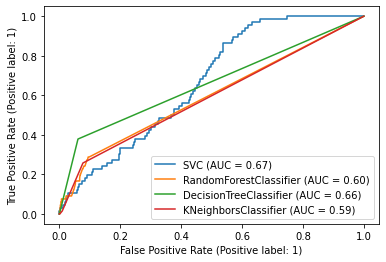

In [169]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(svc,X_test,y_test)
rfc_disp = RocCurveDisplay.from_estimator(rf,X_test,y_test,ax=disp.ax_)
dt_disp = RocCurveDisplay.from_estimator(clf_dt,X_test,y_test,ax=disp.ax_)
knn_disp = RocCurveDisplay.from_estimator(clf_knn,X_test,y_test,ax=disp.ax_)

## So from the above AUC ROC curve, we can observe that the SVC model is the best suited model for this particular problem as it captures and understands 68% of the training data, and on the testing data, it performs well as compared to other models, and its performance is 67% on the testing data. So selecting SVC as the best-performing model

# Saving the SVC model

In [171]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(svc , open ('Stroke_prediction_model' , 'wb'))